<a href="https://colab.research.google.com/github/thuva18/BrainTumorDetection/blob/main/IT24201063_preprocessing_technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing modality: t1. Creating black image.
Missing modality: t1ce. Creating black image.
Missing modality: t2. Creating black image.
Missing modality: flair. Creating black image.
Stacked input shape after handling missing: (4, 240, 240, 155)
Mean intensity per modality: {'t1': np.float64(0.0), 't1ce': np.float64(0.0), 't2': np.float64(0.0), 'flair': np.float64(0.0)}


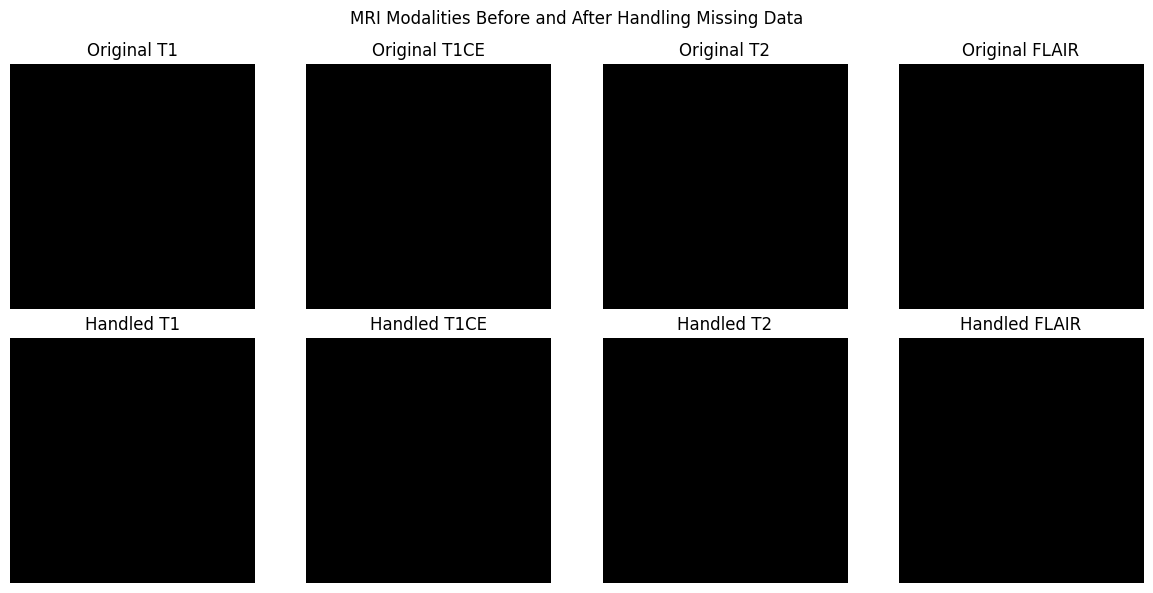

In [1]:
import os
import numpy as np
import nibabel as nib  # For loading NIfTI MRI files
import matplotlib.pyplot as plt

# Step 1: Define expected modalities and simulate a dataset (replace with actual paths)
modalities = ['t1', 't1ce', 't2', 'flair']  # Common MRI sequences for brain tumors
sample_patient = 'patient001'
data_dir = 'data/raw/'  # Your raw data folder

# Simulate file paths (in real case, use os.listdir or glob to find files)
file_paths = {
    't1': f'{data_dir}{sample_patient}_t1.nii.gz',    # Exists
    't1ce': f'{data_dir}{sample_patient}_t1ce.nii.gz',  # Exists
    't2': None,                                       # Missing (simulated)
    'flair': f'{data_dir}{sample_patient}_flair.nii.gz' # Exists
}

# Function to load MRI volume (returns 3D numpy array)
def load_mri(path):
    if path and os.path.exists(path):
        return nib.load(path).get_fdata()  # Shape: (height, width, slices)
    return None

# Step 2: Handle missing data - Replace missing modalities with black (zero) images
image_shape = (240, 240, 155)  # Typical BraTS shape; adjust based on your data
mri_volumes = {}
for mod in modalities:
    vol = load_mri(file_paths.get(mod))
    if vol is None:
        print(f"Missing modality: {mod}. Creating black image.")
        vol = np.zeros(image_shape)  # Black image (all zeros)
    mri_volumes[mod] = vol

# Stack modalities into a 4D array for model input (e.g., channels first)
stacked_input = np.stack([mri_volumes[mod] for mod in modalities], axis=0)  # Shape: (4, height, width, slices)

# Show summary
print("Stacked input shape after handling missing:", stacked_input.shape)
print("Mean intensity per modality:", {mod: np.mean(mri_volumes[mod]) for mod in modalities})

# Step 3: EDA Visualization - Axial slice from middle of volume before/after handling
slice_idx = image_shape[2] // 2  # Middle slice

fig, axes = plt.subplots(2, len(modalities), figsize=(12, 6))
for i, mod in enumerate(modalities):
    # Before: Original (None for missing)
    original = load_mri(file_paths.get(mod))
    axes[0, i].imshow(original[:, :, slice_idx] if original is not None else np.zeros((image_shape[0], image_shape[1])), cmap='gray')
    axes[0, i].set_title(f'Original {mod.upper()}')
    axes[0, i].axis('off')

    # After: Handled
    axes[1, i].imshow(mri_volumes[mod][:, :, slice_idx], cmap='gray')
    axes[1, i].set_title(f'Handled {mod.upper()}')
    axes[1, i].axis('off')

plt.suptitle('MRI Modalities Before and After Handling Missing Data')
plt.tight_layout()
plt.show()  # Save as PNG: plt.savefig('results/eda_visualizations/missing_modalities.png')